In [ ]:
############# Imports ################
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten
from keras.models import Model
import numpy as np, pandas as pd, os
from matplotlib import pyplot as plt
import math

In [ ]:
################# Importing data and defining configuration data ##############
feature = list()
for i in range(1,6):
  feature.extend(["Suit"+str(i), "Rank"+str(i)])

feature.append('class')

training_data_file = os.path.abspath('/content/poker-hand-training-true.csv')
testing_data_file = os.path.abspath('/content/poker-hand-testing.csv')
np.random.seed(600)

# Storing configuration fdata
class configs:
  features = 0
  classes = 0

poker = configs()

In [ ]:
###################### Reading and Analysing Data ###################
train_data = pd.read_csv(training_data_file, names = feature)
test_data = pd.read_csv(testing_data_file, names=feature)

# Extracting features and classes from training data
poker.features = len(train_data.columns) - 1
poker.classes = len(set(train_data['class']))


# Shuffle training data
train_data = train_data.sample(frac=1).reset_index(drop=True)

# Seperating data and classes
train_y = np.array(train_data['class'])
train_x = np.array(train_data.drop('class', 1))
test_y = np.array(test_data['class'])
test_x = np.array(test_data.drop('class', 1))

train_y_onehot = list()
for y in range(len(train_y)):
  temp = [0] * poker.classes
  temp[train_y[y]] = 1
  train_y_onehot.append(temp)

test_y_onehot = list()
for y in range(len(test_y)):
  temp = [0] * poker.classes
  temp[test_y[y]] = 1
  test_y_onehot.append(temp)

train_y_onehot = np.array(train_y_onehot)
test_y_onehot = np.array(test_y_onehot)

print("Features in data sample :", poker.features)
print("Classes in data sample :", poker.classes)

print("Instances in training data :", len(train_data))
print("Instances in testing data :", len(test_data))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


TypeError: ignored

In [ ]:
################### Deep Neural Network Model ###########################
model = Sequential()

# Input layer
model.add(Dense(10, input_shape = (train_x.shape[1],), activation='tanh'))

# Hidden layer
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='tanh'))

# Output layer
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_x, train_y_onehot, epochs = 450, batch_size = 500, verbose=0)

Matches : 21038 / 25010 = 84.11835265893643
Average Error : 0.18404638144742103
RMSE : 0.5332225328061476


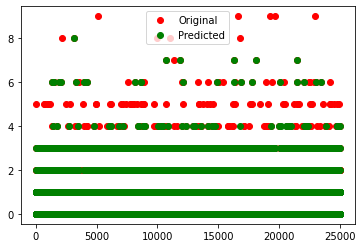

In [ ]:
########################## Running Prediction on Training data ##########################
preds = [list(x) for x in model.predict(train_x)]
for i in range(len(preds)):
    preds[i] = preds[i].index(max(preds[i]))


train_matches = 0
for i in range(len(train_y)):
    if train_y[i] == preds[i]:
        train_matches += 1

print("Matches :", train_matches, '/', len(train_y), '=', train_matches/len(train_y) * 100)
print("Average Error :", sum([math.fabs(x-y) for x, y in zip(train_y, preds)])/len(train_y))
print("RMSE :", math.sqrt(sum([(x-y)**2 for x, y in zip(train_y, preds)])/len(train_y)))

plt.plot(train_y, 'ro', label='Original')
plt.plot(preds, 'go', label='Predicted')
plt.legend()
plt.show()

Matches : 794946 / 1000000 = 79.4946
Average Error : 0.238674
RMSE : 0.5939983164959308


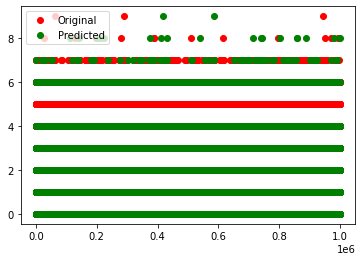

In [ ]:
#################### Running Prediction on Testing data ###################
preds = [list(x) for x in model.predict(test_x)]
for i in range(len(preds)):
    preds[i] = preds[i].index(max(preds[i]))

test_matches = 0
for i in range(len(test_y)):
    if test_y[i] == preds[i]:
        test_matches += 1

print("Matches :", test_matches, '/', len(test_y), '=', test_matches/len(test_y) * 100)
print("Average Error :", sum([math.fabs(x-y) for x, y in zip(test_y, preds)])/len(test_y))
print("RMSE :", math.sqrt(sum([(x-y)**2 for x, y in zip(test_y, preds)])/len(test_y)))

plt.plot(test_y, 'ro', label='Original')
plt.plot(preds, 'go', label='Predicted')
plt.legend()
plt.show()

In [ ]:
##################### Evaluating the Model ########################
scores = model.evaluate(train_x, train_y_onehot)
print("Train =", model.metrics_names[1], scores[1] * 100)

scores = model.evaluate(test_x, test_y_onehot)
print("Test =", model.metrics_names[1], scores[1] * 100)

782/782 [==============================] - 1s 1ms/step - loss: 0.3818 - accuracy: 0.8412
Train = accuracy 84.11835432052612
31250/31250 [==============================] - 66s 2ms/step - loss: 0.5197 - accuracy: 0.7949
Test = accuracy 79.4946014881134


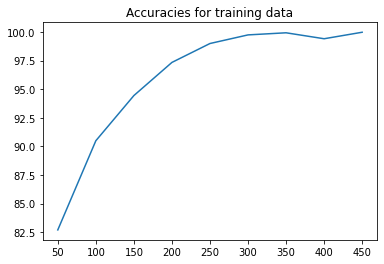

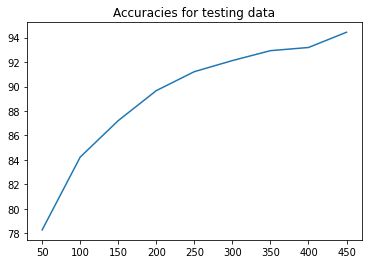

In [ ]:
##################### Analysing accuracy of the model ##################
train_accuracies = list()
test_accuracies = list()

for iterations in range(50, 500, 50):
    model.fit(train_x, train_y_onehot, epochs = iterations, batch_size = 500, verbose=0)
    scores = model.evaluate(train_x, train_y_onehot, verbose=0)
    train_accuracies.append(scores[1]* 100)
    scores = model.evaluate(test_x, test_y_onehot, verbose=0)
    test_accuracies.append(scores[1]* 100)

plt.title('Accuracies for training data')
plt.plot(range(50, 500, 50), train_accuracies)
plt.show()
plt.title('Accuracies for testing data')
plt.plot(range(50, 500, 50), test_accuracies)
plt.show()